In [1]:
import sys
# sys.path.append("../..")
# sys.path.insert(1, 'C:/Users/isrqa/ELIopt-main/ELIopt-main/algorithms')
from bayes_opt import BayesianOptimization
from L1_DifferentialEvolution import extract_data, model, diff_evolution
import physics
from losses import Losses
from scipy.optimize import Bounds
from scipy.optimize import minimize
from pyswarm import pso
import numpy as np
import matplotlib.pyplot as plt

In [2]:
frequency, intensity = extract_data() # extracting the desired information

# compressor parameters - obtained as minus the stretcher one - TO BE FIXED WITH REAL ONES ONCE THEY ARE AVAILABLE
COMPRESSOR = -1 * np.array((267.422 * 1e-24, -2.384 * 1e-36, 9.54893 * 1e-50)) # in s^2, s^3 and s^4 (SI units)
# non linearity parameter
B = 2
# cutoff frequencies, in THz, used to remove noise - derived from visual inspection
CUTOFF = (289.95, 291.91)
# model instantiation
l1_pump = model(frequency, intensity, COMPRESSOR, B, CUTOFF, num_points=int(5e3))

losses = Losses(l1_pump)

bounds_DE = Bounds(
            # GDD         # TOD          # FOD
    lb = (2.3522e-22, -1.003635e-34, 4.774465e-50),
    ub = (2.99624e-22, 9.55955e-35, 1.4323395e-49)
)

bounds_matrix = np.vstack((bounds_DE.lb, bounds_DE.ub)).T
disp_bounds = np.sort(l1_pump.translate_control(bounds_matrix, verse = "to_disp"))

In [3]:
def outer_objfunc(mutation:float, cross_p:float, population_size:float) -> float: 
    """
    This is the outher objective function which is taking as input values characteristic of the 
    optimisation process.
    For further documentantion on the relevance of these parameters and their effect on the optimisation 
    route check literature.
    """
    population_size = int(population_size) # must be int
    
    candidate_best = diff_evolution(
        objective_function = losses.loss3,
        bounds = disp_bounds,
        mutation = mutation, 
        cross_p = cross_p, 
        population_size = population_size,
        verbose = 0, 
        maxit = 500, 
        print_every = 50
    )
    
    return -1 * losses.loss3(candidate_best) # maximizing

In [66]:
params_bounds = {
    "mutation": (0.5, 1.99), 
    "cross_p": (0, 1), 
    "population_size": (10, 50)
}

optimizer = BayesianOptimization(
    f = outer_objfunc, 
    pbounds = params_bounds, 
    random_state = 10, 
    verbose = 1
)

n_init, n_iter = 20, 20
optimizer.maximize(init_points = n_init, n_iter = n_iter)


|   iter    |  target   |  cross_p  | mutation  | popula... |
-------------------------------------------------------------
 Iterations = 17500
 Iterations = 9000
 Iterations = 8000
 Iterations = 24000
 Iterations = 21000
 Iterations = 10500
 Iterations = 15500
 Iterations = 18000
 Iterations = 17000
 Iterations = 17000
 Iterations = 23000
 Iterations = 11000
 Iterations = 5500
 Iterations = 21000
 Iterations = 12000
 Iterations = 22500
 Iterations = 12500
 Iterations = 8000
 Iterations = 24500
 Iterations = 10000
 Iterations = 17000
|  21       | -1.443    |  0.8707   |  1.618    |  34.76    |
 Iterations = 17000
 Iterations = 17000
 Iterations = 19500
 Iterations = 7500
 Iterations = 24000
 Iterations = 17500
|  27       | -1.443    |  0.6115   |  1.316    |  35.41    |
 Iterations = 10000
 Iterations = 13500
 Iterations = 19500
 Iterations = 19500
 Iterations = 19000
 Iterations = 6000
 Iterations = 10500
 Iterations = 10000
 Iterations = 10500
 Iterations = 10000
 Iterations = 2000

In [4]:
lb = [-5.31305788e-01, -3.14772231e+08, -2.55151879e+15]
ub = [-4.17101926e-01, 3.01620182e+08, 1.56859005e+15]

# xopt, fopt = pso(losses.loss3, lb, ub, swarmsize=100, debug=True, maxiter=17)

xopt, fopt = pso(losses.loss3, lb, ub, swarmsize=50, omega=0.5, phip=0.3, phig=0.5, maxiter=50, debug=True)

No constraints given.
New best for swarm at iteration 1: [-4.83355123e-01 -3.14106789e+07  1.41227774e+15] 37.51562059447959
Best after iteration 1: [-4.83355123e-01 -3.14106789e+07  1.41227774e+15] 37.51562059447959
Best after iteration 2: [-4.83355123e-01 -3.14106789e+07  1.41227774e+15] 37.51562059447959
New best for swarm at iteration 3: [-4.79483188e-01 -4.18655990e+06  9.52169387e+14] 18.699478374520393
Best after iteration 3: [-4.79483188e-01 -4.18655990e+06  9.52169387e+14] 18.699478374520393
New best for swarm at iteration 4: [-4.73776305e-01 -1.08475597e+07  1.06452370e+15] 12.256033114197809
Best after iteration 4: [-4.73776305e-01 -1.08475597e+07  1.06452370e+15] 12.256033114197809
New best for swarm at iteration 5: [-4.75798319e-01 -1.70729841e+07  8.77090438e+14] 10.387483006048384
Best after iteration 5: [-4.75798319e-01 -1.70729841e+07  8.77090438e+14] 10.387483006048384
New best for swarm at iteration 6: [-4.75681526e-01 -3.51988908e+06  6.95577337e+14] 7.9452331031829

Best after iteration 39: [-4.75409607e-01 -6.93458074e+06  1.36027601e+15] 1.4671706012362982
New best for swarm at iteration 40: [-4.75409609e-01 -6.93524874e+06  1.36055793e+15] 1.4671288294129163
New best for swarm at iteration 40: [-4.75409792e-01 -6.93566868e+06  1.36066142e+15] 1.4671149302240383
Best after iteration 40: [-4.75409792e-01 -6.93566868e+06  1.36066142e+15] 1.4671149302240383
New best for swarm at iteration 41: [-4.75409666e-01 -6.93570943e+06  1.36070019e+15] 1.4671104487760667
New best for swarm at iteration 41: [-4.75409693e-01 -6.93521489e+06  1.36079026e+15] 1.4670935249148362
New best for swarm at iteration 41: [-4.75409521e-01 -6.93518888e+06  1.36096822e+15] 1.4670691494439667
Best after iteration 41: [-4.75409521e-01 -6.93518888e+06  1.36096822e+15] 1.4670691494439667
New best for swarm at iteration 42: [-4.75409775e-01 -6.93527291e+06  1.36095229e+15] 1.4670690838807876
New best for swarm at iteration 42: [-4.75409698e-01 -6.93554671e+06  1.36103438e+15] 1.

In [12]:
rsult = minimize(losses.loss3, xopt, method='Nelder-Mead')

print('Status : %s' % rsult['message'])
print('Total Evaluations: %d' % rsult['nfev'])
solution = rsult['x']
evaluation = losses.loss3(solution)
print('Solution: f(%s) = %.5f' % (solution, evaluation))
print('(RMSE)',losses.loss3(solution))

Status : Optimization terminated successfully.
Total Evaluations: 385
Solution: f([-4.75711318e-01 -7.00593526e+06  2.45034510e+15]) = 1.36228
(RMSE) 1.3622757674017645


In [5]:
# cross_p, mutation, pop_size = optimizer.max["params"].values()
cross_p = 0.622245891254157
mutation = 1.9301295865991803
pop_size = 21.46001053968225
# cross_p, mutation, pop_size = optimizer.max["params"].values()
# training with the best parameters and increased number of iterations
candidate_best = diff_evolution(
        objective_function = losses.loss3,
        bounds = disp_bounds,
        mutation = mutation, 
        cross_p = cross_p, 
        population_size = int(pop_size),
        verbose = 1, 
        maxit = 120, 
        print_every = 1
)
print(losses.loss3(candidate_best))
print(candidate_best)

Iteration 0 - Objective Function value: 60.61990868344495
Iteration 1 - Objective Function value: 60.61990868344495
Iteration 2 - Objective Function value: 60.61990868344495
Iteration 3 - Objective Function value: 60.61990868344495
Iteration 4 - Objective Function value: 60.61990868344495
Iteration 5 - Objective Function value: 60.61990868344495
Iteration 6 - Objective Function value: 60.61990868344495
Iteration 7 - Objective Function value: 38.43442670161388
Iteration 8 - Objective Function value: 25.524390234416185
Iteration 9 - Objective Function value: 25.524390234416185
Iteration 10 - Objective Function value: 25.524390234416185
Iteration 11 - Objective Function value: 25.524390234416185
Iteration 12 - Objective Function value: 21.496787007504107
Iteration 13 - Objective Function value: 21.496787007504107
Iteration 14 - Objective Function value: 21.496787007504107
Iteration 15 - Objective Function value: 21.496787007504107
Iteration 16 - Objective Function value: 21.49678700750410

In [6]:
from NelderMead import bounded_nelder_mead
import math
import numpy as np

print_NM_progress = 1

# Define the initial position and bounds
bounds=((-5.31305788e-01, -4.17101926e-01), (-3.14772231e+08, 3.01620182e+08), (-2.55151879e+15, 1.56859005e+15))

# Run the optimization using Nelder-Mead method
best_result = bounded_nelder_mead(losses.loss3, candidate_best, disp_bounds, print_NM_progress)

# Print the results
# print("Best score:", best_score)
# print("Iterations:", iters)
# print("Function evaluations:", fev)

iteration: 1
best value of objective function so far: 1.5465100228346569
best candidate: [-4.75381047e-01 -6.88017753e+06  1.56859005e+15]
iteration: 2
best value of objective function so far: 1.5465100228346569
best candidate: [-4.75381047e-01 -6.88017753e+06  1.56859005e+15]
iteration: 3
best value of objective function so far: 1.5465100228346569
best candidate: [-4.75381047e-01 -6.88017753e+06  1.56859005e+15]
iteration: 4
best value of objective function so far: 1.5465100228346569
best candidate: [-4.75381047e-01 -6.88017753e+06  1.56859005e+15]
iteration: 5
best value of objective function so far: 1.5465100228346569
best candidate: [-4.75381047e-01 -6.88017753e+06  1.56859005e+15]
iteration: 6
best value of objective function so far: 1.5465100228346569
best candidate: [-4.75381047e-01 -6.88017753e+06  1.56859005e+15]
iteration: 7
best value of objective function so far: 1.5465100228346569
best candidate: [-4.75381047e-01 -6.88017753e+06  1.56859005e+15]
iteration: 8
best value of 

In [16]:
Bounds=((-5.31305788e-01, -4.17101926e-01), (-3.14772231e+08, 3.01620182e+08), (-2.55151879e+15, 1.56859005e+15))
rsult = minimize(losses.loss3, candidate_best, method='L-BFGS-B', bounds= Bounds )

print('Status : %s' % rsult['message'])
print('Total Evaluations: %d' % rsult['nfev'])
solution = rsult['x']
# evaluation = rmse(solution)
evaluation = losses.loss3(solution)
print('Solution: f(%s) = %.5f' % (solution, evaluation))
# print('(RMSE)',rmse(solution))
print('(RMSE)',losses.loss3(solution))
candidate_best = solution

Status : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
Total Evaluations: 56
Solution: f([-4.75347758e-01 -5.92370290e+06  1.56859005e+15]) = 3.20347
(RMSE) 3.203471595474933


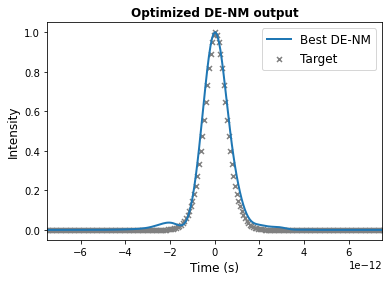

In [65]:
# candidate_best = solution
# time, profile = l1_pump.forward_pass(candidate_best)
time, profile = l1_pump.forward_pass(best_score[0])
fig, ax = plt.subplots()

ax.set_title("Optimized DE-NM output", fontweight = "bold")
ax.scatter(losses.target_time, losses.target_profile, marker = "x", c = "grey", s = 25, label = "Target")
ax.plot(losses.target_time, np.roll(profile, - np.argmax(profile) + np.argmax(losses.target_profile)), label = "Best DE-NM", lw = 2)

ax.set_xlim(-7.5e-12, 7.5e-12); ax.set_xlabel("Time (s)", fontsize = 12); ax.set_ylabel("Intensity", fontsize = 12)
ax.legend(fontsize = 12)
plt.show()

In [8]:
from __future__ import division
import random
import math

#--- COST FUNCTION ------------------------------------------------------------+

# function we are attempting to optimize (minimize)
def func1(x):
    total=0
    for i in range(len(x)):
        total+=(x[i]-3)**2
    return total

#--- MAIN ---------------------------------------------------------------------+

class Particle:
    def __init__(self,x0):
        self.position_i=[]          # particle position
        self.velocity_i=[]          # particle velocity
        self.pos_best_i=[]          # best position individual
        self.err_best_i=-1          # best error individual
        self.err_i=-1               # error individual

        for i in range(0,num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))
            self.position_i.append(x0[i])

    # evaluate current fitness
    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)

        # check to see if the current position is an individual best
        if self.err_i < self.err_best_i or self.err_best_i==-1:
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i

    # update new particle velocity
    def update_velocity(self,pos_best_g,i):
# #         w=0.5       # constant inertia weight (how much to weigh the previous velocity)
#         w=0.03*maxiter/(i+1) 
#         c1=1        # cognative constant
# #         c2=2      # social constant
#         c2=9*i/maxiter      # social constant


#         w=0.72984        # constant inertia weight (how much to weigh the previous velocity)
#         c1=2.05        # cognative constant
#         c2=2.05        # social constant
        
        w = (0.4/maxiter**2) * (i - maxiter)**2 + 0.4
        c1 = -3 * i / maxiter + 3.5
        c2 =  3 * i / maxiter + 0.5

        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()

            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    # update the particle position based off new velocity updates
    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]

            # adjust maximum position if necessary
            if self.position_i[i]>bounds[i][1]:
                self.position_i[i]=bounds[i][1]

            # adjust minimum position if neseccary
            if self.position_i[i] < bounds[i][0]:
                self.position_i[i]=bounds[i][0]
                
class PSO():
    def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
        global num_dimensions

#         num_dimensions=len(x0)
        num_dimensions=3
        err_best_g=-1                   # best error for group
        pos_best_g=[]                   # best position for group
        
        

        # establish the swarm
        swarm=[]
        for i in range(0,num_particles):
            swarm.append(Particle(x0[i,:]))
#             swarm.append(Particle(x0))
            

        # begin optimization loop
        i=0
        while i < maxiter:
            #print i,err_best_g
            # cycle through particles in swarm and evaluate fitness
            for j in range(0,num_particles):
                swarm[j].evaluate(costFunc)

                # determine if current particle is the best (globally)
                if swarm[j].err_i < err_best_g or err_best_g == -1:
                    pos_best_g=list(swarm[j].position_i)
                    err_best_g=float(swarm[j].err_i)

            # cycle through swarm and update velocities and position
            for j in range(0,num_particles):
                swarm[j].update_velocity(pos_best_g,i)
                swarm[j].update_position(bounds)
#                 print (err_best_g)
            i+=1

        # print final results
        print ('FINAL iteration:', i)
        print (pos_best_g)
        print (err_best_g)
        PSO.pos_best_g = pos_best_g
        
#         return pos_best_g

if __name__ == "__PSO__":
    main()

#--- RUN ----------------------------------------------------------------------+

num_particles=50
maxiter=50
num_dimensions=3
bounds=[(-5.31305788e-01,-4.17101926e-01),(-3.14772231e+08,3.01620182e+08),(-2.55151879e+15,1.56859005e+15)] 
pop2 = np.random.rand(num_particles, num_dimensions)
min_b, max_b = np.asarray(bounds).T
diff = np.fabs(min_b - max_b)
pop_denorm2 = min_b + pop2 * diff
# lb = [-5.31305788e-01, -3.14772231e+08, -2.55151879e+15]
# ub = [-4.17101926e-01, 3.01620182e+08, 1.56859005e+15] -4.75711318e-01 -7.00593521e+06  2.45034517e+15

# initial=[5,5]               # initial starting location [x1,x2...]
# bounds=[(-2.3522e-22,2.99624e-22),(-1.003635e-34,9.55955e-35),(4.774465e-50,1.4323395e-49)]  # input bounds [(x1_min,x1_max),(x2_min,x2_max)...]
PSO(losses.loss3,pop_denorm2,bounds,num_particles,maxiter)
candidate_best = PSO.pos_best_g

FINAL iteration: 50
[-0.47512918733317006, -8330690.477703821, -1425987498018018.8]
2.1211180442670647


In [10]:
rsult = minimize(losses.loss3, candidate_best, method='Nelder-Mead')

print('Status : %s' % rsult['message'])
print('Total Evaluations: %d' % rsult['nfev'])
solution = rsult['x']
# evaluation = rmse(solution)
evaluation = losses.loss3(solution)
print('Solution: f(%s) = %.5f' % (solution, evaluation))
# print('(RMSE)',rmse(solution))
print('(RMSE)',losses.loss3(solution))
candidate_best = solution

Status : Maximum number of function evaluations has been exceeded.
Total Evaluations: 600
Solution: f([-4.75127276e-01 -8.32487389e+06 -1.42127294e+15]) = 2.12110
(RMSE) 2.12110238424599


In [12]:
candidate_best

array([-4.75711318e-01, -7.00593514e+06,  2.45034524e+15])